In [ ]:
# Install required libraries (if not already installed in Colab)
!pip install openpyxl

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


In [5]:
# Upload dataset manually (if file is .csv)
from google.colab import files

uploaded = files.upload()  # Select the file "Online Retail.csv"

# Load dataset
df = pd.read_csv(list(uploaded.keys())[0], encoding="ISO-8859-1")  # common encoding for retail data
df.head()


Saving OnlineRetail.csv to OnlineRetail (1).csv


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Shape and info
print("Shape of dataset:", df.shape)
print("\nDataset Info:\n")
print(df.info())

# Missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Sample data
df.sample(5)


Shape of dataset: (541909, 8)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Missing values per column:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
255184,559338,46776B,WOVEN BERRIES CUSHION COVER,1,7/7/2011 16:30,4.13,NaN,United Kingdom
462999,576052,23681,LUNCH BAG RED VINTAGE DOILY,3,11/13/2011 14:48,1.65,15787.0,United Kingdom
216110,555819,21770,OPEN CLOSED METAL SIGN,6,6/7/2011 12:00,4.95,15073.0,United Kingdom
297842,562955,22069,BROWN PIRATE TREASURE CHEST,3,8/11/2011 10:14,4.13,NaN,United Kingdom
514864,579750,23284,DOORMAT KEEP CALM AND COME IN,10,11/30/2011 14:42,7.08,13536.0,United Kingdom


In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with missing CustomerID (important for analysis)
df = df.dropna(subset=["CustomerID"])

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Ensure numeric columns
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["UnitPrice"] = pd.to_numeric(df["UnitPrice"], errors="coerce")

# Create Sales column
df["Sales"] = df["Quantity"] * df["UnitPrice"]

print("After cleaning, shape of dataset:", df.shape)
df.head()


After cleaning, shape of dataset: (401604, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
# Summary statistics
print("Sales Statistics:\n", df["Sales"].describe())
print("\nQuantity Statistics:\n", df["Quantity"].describe())

# Unique products & customers
print("\nUnique Products:", df["Description"].nunique())
print("Unique Customers:", df["CustomerID"].nunique())


Sales Statistics:
 count    401604.000000
mean         20.613638
std         430.352218
min     -168469.600000
25%           4.250000
50%          11.700000
75%          19.800000
max      168469.600000
Name: Sales, dtype: float64

Quantity Statistics:
 count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

Unique Products: 3896
Unique Customers: 4372


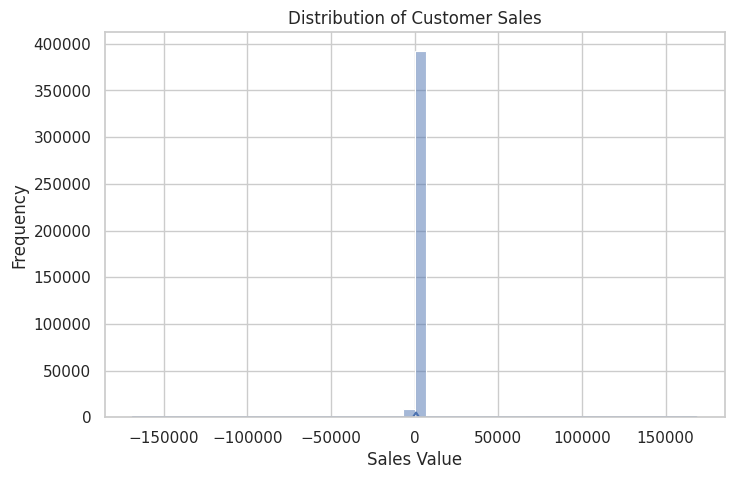

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["Sales"], bins=50, kde=True)
plt.title("Distribution of Customer Sales")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-2220003873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


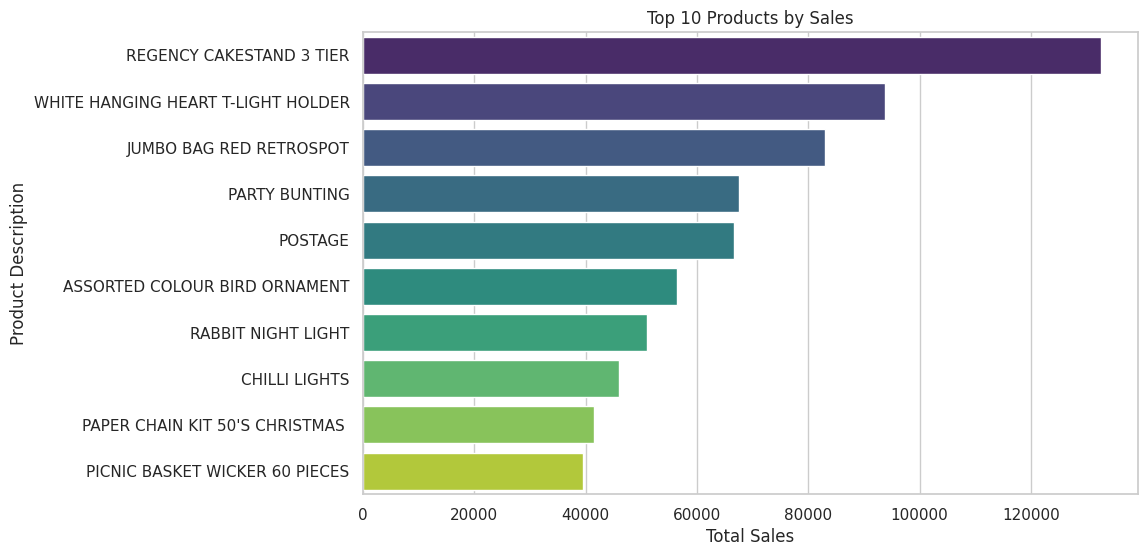

In [10]:
top_products = df.groupby("Description")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Description")
plt.show()


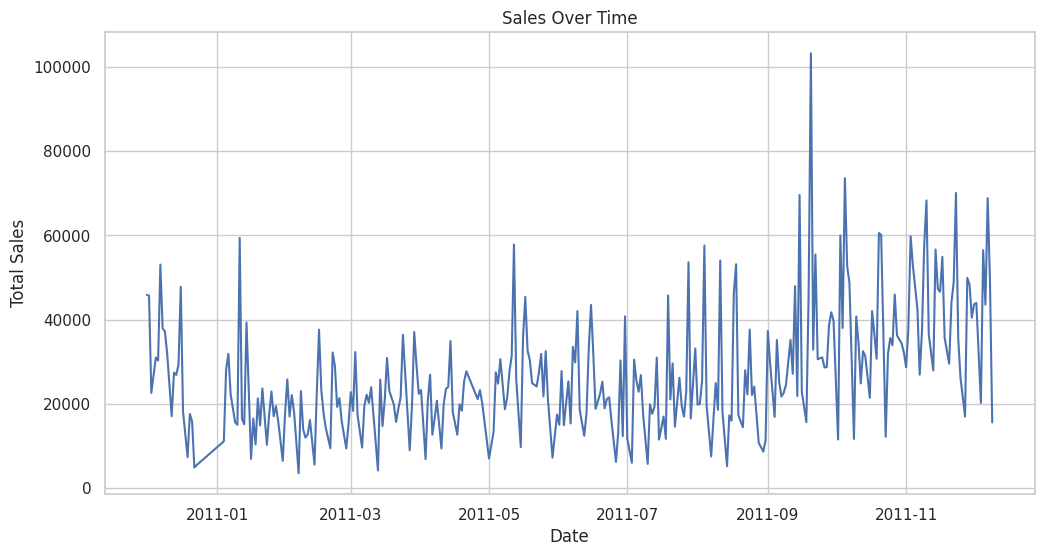

In [11]:
sales_time = df.groupby(df["InvoiceDate"].dt.date)["Sales"].sum()

plt.figure(figsize=(12,6))
sales_time.plot()
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


## 📊 Key Business Insights from EDA

1. **Top-selling Products** – Certain products contribute disproportionately to revenue.  
2. **Sales Trend** – Clear seasonal spikes, especially during holiday periods.  
3. **Customer Base** – A small number of customers generate most of the revenue.  
4. **Order Values** – Sales distribution is highly skewed, with many low-value orders and few very high-value orders.  
5. **Growth Opportunities** – Identifying best-performing product categories helps target promotions.  
